# Test harness for applied vibration class

### Import the libraries

In [1]:
import numpy as np
import math
import pandas as pd

### Import the signal processing library

In [2]:
from appvib import ClSigFeatures

#### Verify help and class structure

In [3]:
help(ClSigFeatures)

Help on class ClSigFeatures in module appvib:

class ClSigFeatures(builtins.object)
 |  ClSigFeatures(np_sig, d_fs)
 |  
 |  Class to manage signal features on scope data and other signals
 |  
 |  Example usage:
 |      cl_test = ClSigFeatures(np.array([1.,2., 3.]),1.1)
 |  
 |  Should produce:
 |  
 |      print('np_d_sig: '+ np.array2string(cl_test.np_d_sig))
 |      print('timebase_scale: ' + '%0.3f' % cl_test.timebase_scale)
 |      print('i_ns: ' + '%3.f' % cl_test.i_ns)
 |      print('d_t_del: ' + '%0.3f' % cl_test.d_t_del)
 |      print('d_time' + np.array2string(cl_test.d_time))
 |  
 |      np_d_sig: [1. 2. 3.]
 |      timebase_scale: 1.000
 |      i_ns:   3
 |      d_t_del: 4.000
 |      d_time[0. 4. 8.]
 |  
 |      Attributes
 |      ----------
 |  
 |      Methods
 |      -------
 |  
 |  Methods defined here:
 |  
 |  __init__(self, np_sig, d_fs)
 |      Parameters
 |      ----------
 |      np_sig : numpy array
 |          Vector with the signal of interest. Can be real

### Define plot mode. 
Interactive mode is helpful for visuallizing the program execution

In [4]:
#%matplotlib widget

### Test for minimal construction

In [5]:
ClSigTestMin = ClSigFeatures(np.array([1.,2., 3.]),1.1)

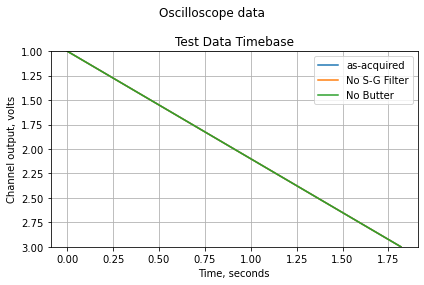

In [6]:
lst_testmin = ClSigTestMin.plt_sigs()

### Test - Even number of samples

In this test a simple sin wave is created and passed into the signal feature object for processing

In [7]:
d_fs = 2048
i_ns = (d_fs*2)
d_freq_sig = 20./(float(i_ns)/d_fs)
print('Signal frequency, hertz: ' + '%0.10f' % d_freq_sig)
d_timebase_scale = float(i_ns)/(d_fs*12.)
d_time_ext = np.linspace(0,(i_ns-1),i_ns)/float(i_ns)
np_d_test = np.sin(2 * math.pi * d_freq_sig * d_time_ext )
ClSigEven = ClSigFeatures(np_d_test, d_timebase_scale)

Signal frequency, hertz: 10.0000000000


#### Test plot

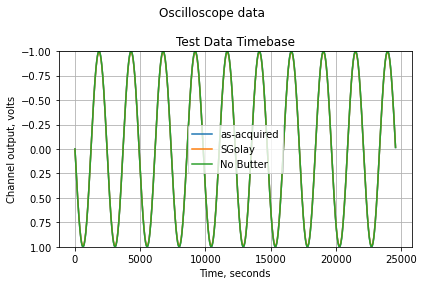

In [8]:
lst_sig_even = ClSigEven.plt_sigs()

In [9]:
lst_spec_even = ClSigEven.plt_spec()

TypeError: 'float' object is not callable

Extract the maximum value (assumed to be our component at 10 hertz) and check that the amplitude is very close to 1.

In [ ]:
d_test_point = np.max(np.abs(lst_spec_even[2]))
print('Maximum spectral value: ' + '%0.10f' % d_test_point)
assert abs(d_test_point - 1.) < 1e-12, 'Failed to find even component amplitude'

### Test - Odd number of samples

In this test a simple sin wave with an odd number of samples is created and passed into the signal feature object for processing. This is primarily to test the rfft scaling.

In [ ]:
d_fs = 2047
i_ns = (d_fs*3)
d_freq_sig = 30./(float(i_ns)/d_fs)
print('Signal frequency, hertz: ' + '%0.6f' % d_freq_sig)
d_time_ext = np.linspace(0,(i_ns-1),i_ns)/float(i_ns)
np_d_test = np.sin(2 * math.pi * d_freq_sig * d_time_ext )
ClSigOdd = ClSigFeatures(np_d_test, d_fs)

#### Test plot

In [ ]:
lst_plot_odd = ClSigOdd.plt_sigs()

In [ ]:
lst_spec_odd = ClSigOdd.plt_spec()

In [ ]:
d_test_point = np.max(np.abs(lst_spec_odd[2]))
print('Maximum spectral value: ' + '%0.6f' % d_test_point)
assert abs(d_test_point - 1.) < 1e-3, 'Failed to find odd component amplitude'

### Test for engineering units

In [ ]:
ClSigTestMin.str_eu = "g's"

In [ ]:
lst_sigs_eu = ClSigTestMin.plt_sigs()

In [ ]:
lst_sigs_eu.set_size_inches(4*1.6, 4)
lst_sigs_eu.savefig('Test_Timebase_EU.pdf')

In [ ]:
lst_spec_eu = ClSigTestMin.plt_spec()

### Test plot annotations

In [ ]:
ClSigTestMin.str_plot_desc = 'My Great Plot'
lst_sigs_title = ClSigTestMin.plt_sigs()

In [ ]:
lst_spec_title = ClSigTestMin.plt_spec()

In [ ]:
ClSigTestMin.ylim_tb = [-2., 2.]
lst_sigs_ylim_tb = ClSigTestMin.plt_sigs()

#### Labelling for the minimum instatiation case

In [ ]:
ClSigTestMin.b_spec_peak = True
lst_spec_peak_tb = ClSigTestMin.plt_spec()

#### Labelling for the even number of sample cases

In [ ]:
ClSigEven.b_spec_peak = True
lst_spec_peak_tb = ClSigEven.plt_spec()

#### Labelling for the odd number of sample cases

In [ ]:
ClSigOdd.b_spec_peak = True
lst_spec_peak_tb = ClSigOdd.plt_spec()

### Test for minimal construction, multiple channels

#### First channel (index = 0)

In [ ]:
d_fs_ch1 = 1.1
cl_sig_mult_ch = ClSigFeatures(np.array([1.,2., 3.]),d_fs_ch1)

#### Second channel (index = 1)

In [ ]:
d_fs_ch2 = 2.2
np_ch2 = np.array([3., 2.5, 2.])
cl_sig_mult_ch.idx_add_sig(np_ch2, d_fs_ch2) 

In [ ]:
lst_testmin = cl_sig_mult_ch.plt_sigs()

In [ ]:
cl_sig_mult_ch.b_save_data()

Read the file back in and compare to the input data

In [ ]:
import csv

In [ ]:
str_filename = cl_sig_mult_ch.str_file
print(str_filename)
file_handle = open(str_filename)
csvreader = csv.reader(file_handle)
csv_header = []
csv_header = next(csvreader)
print(csv_header)

In [ ]:
df_test = pd.read_csv(str_filename, header=None, skiprows=2, names=csv_header[0:5] )
df_test

In [ ]:
assert abs(df_test.CH2[2] - np_ch2[2]) < 1e-15, 'Failed to save second data series' 
assert abs(df_test.CH2[1] - np_ch2[1]) < 1e-15, 'Failed to save second data series' 